## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re
from datetime import date 
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
# Read the data and dump it
f = open("Final-player.txt", "r")
dump = f.read()

In [3]:
# Split every line of the data 
dump = dump.split("\n")

In [4]:
# Create 3 different lists to store data
player_info = []
transfer_info = []
injury_info = []
for i in dump:
    player_info.append(i.split(", [")[0])
    transfer_info.append(i.split(", [")[1])
    injury_info.append(i.split(", [")[2])

# Data Cleaning

I have divided the data into 3 different sections: <br>
#1st: Which contains player's basic details <br>
#2nd: Player's transfer data <br>
#3rd: Player's injuries data <br>

## Data cleaning of Player's info

In [5]:
# Create a dataframe from the list
player_info_df = pd.DataFrame(player_info)

# Rename the column
player_info_df.columns = ["Player_Info"]

#Creating separate columns for each field
columns = ['playerId', 'name', 'club', 'club_value', 'birth', 'weight', 'height', 'country', 'role', 'foot']

for i, col in zip(range(len(columns)), columns):
    player_info_df[col] = player_info_df['Player_Info'].str.split(", u", n=9, expand=True)[i]


player_info_df.drop(["Player_Info"], axis=1, inplace=True)

player_info_df.head()

,playerId,name,club,club_value,birth,weight,height,country,role,foot
0,[(u'238223','Ederson','Manchester City',"'1,14 Bill. \u20ac'",'1993-08-17','89',"'1,88\xa0'",'Brazil','Goalkeeper','left'
1,(u'40423','Claudio Bravo','Manchester City',"'1,14 Bill. \u20ac'",'1983-04-13','84',"'1,84\xa0'",'Chile','Goalkeeper','right'
2,(u'371021','Arijanet Muri\u0107','Manchester City',"'1,14 Bill. \u20ac'",'1998-11-07','-',"'1,98\xa0'",'Kosovo','Goalkeeper','right'
3,(u'186590','John Stones','Manchester City',"'1,14 Bill. \u20ac'",'1994-05-28','69',"'1,88\xa0'",'England','Defender - Centre-Back','right'
4,(u'176553','Aymeric Laporte','Manchester City',"'1,14 Bill. \u20ac'",'1994-05-27','85',"'1,91\xa0'",'France','Defender - Centre-Back','left'


In [6]:
# Rules for the columns to clean data
player_info_df["height"] = player_info_df["height"].apply(lambda x: str(x)[1:-5])
player_info_df["club_value"] = player_info_df["club_value"].apply(lambda x: x[1:-8])

char_col = ['name', 'club', 'birth', 'country', 'role', 'foot']
for col in char_col:
    player_info_df[col] = player_info_df[col].apply(lambda x: str(x)[1:-1])
    
num_col = ["playerId", "height", "weight"]
for col in num_col:
    player_info_df[col] = player_info_df[col].apply(lambda x: re.sub('\D', '', str(x)))

player_info_df["height"] = player_info_df["height"].apply(lambda x: np.nan if x == '' else float(x))
player_info_df["weight"] = player_info_df["weight"].apply(lambda x: np.nan if x == '' else float(x))

# Keep only non-missing birth players
#player_info_df = player_info_df[player_info_df["birth"] != ""]

# Calculate age of the player
player_info_df["birth_year"] = player_info_df['birth'].str.split("-", n=3, expand=True)[0]
player_info_df["curr_year"] = str(date.today()).split("-")[0]

player_info_df["birth_year"] = player_info_df["birth_year"].apply(lambda x: re.sub('\D', '', str(x)))
player_info_df["birth_year"] = player_info_df["birth_year"].apply(lambda x: np.nan if x==""
                                                                              else float(x))

player_info_df["curr_year"] = player_info_df["curr_year"].apply(lambda x: re.sub('\D', '', str(x)))
player_info_df["curr_year"] = player_info_df["curr_year"].apply(lambda x: np.nan if x==""
                                                                              else float(x))

# Difference of current year with birth year 
player_info_df["player_age"] = player_info_df["curr_year"] - player_info_df["birth_year"]
#player_info_df = player_info_df[player_info_df["player_age"] != np.nan]

# Clean Club value field
player_info_df["num"] = player_info_df["club_value"].str.split(" ", n=2, expand=True)[0]
player_info_df["deno"] = player_info_df["club_value"].str.split(" ", n=2, expand=True)[1]
player_info_df["final_value"] = player_info_df["num"] + " " + player_info_df["deno"]
player_info_df["club_value"] = player_info_df["final_value"]

# Delete irrelevant columns
player_info_df.drop(["num","deno","final_value", "birth_year", "curr_year"], axis=1, inplace=True)

player_info_df.head()

,playerId,name,club,club_value,birth,weight,height,country,role,foot,player_age
0,238223,Ederson,Manchester City,"1,14 Bill.",1993-08-17,89.0,188.0,Brazil,Goalkeeper,left,27.0
1,40423,Claudio Bravo,Manchester City,"1,14 Bill.",1983-04-13,84.0,184.0,Chile,Goalkeeper,right,37.0
2,371021,Arijanet Muri\u0107,Manchester City,"1,14 Bill.",1998-11-07,NaN,198.0,Kosovo,Goalkeeper,right,22.0
3,186590,John Stones,Manchester City,"1,14 Bill.",1994-05-28,69.0,188.0,England,Defender - Centre-Back,right,26.0
4,176553,Aymeric Laporte,Manchester City,"1,14 Bill.",1994-05-27,85.0,191.0,France,Defender - Centre-Back,left,26.0


## Player's Transfer Data Cleaning

In [8]:
# Create a dataframe from the list
transfer_info_df = pd.DataFrame(transfer_info, columns=["transfer_info"])

# Calculate number of transfer for the player
transfer_info_df["no_of_transfers"] = transfer_info_df["transfer_info"].apply(lambda x: str(x).count("(u"))

# Take Player_id column from player info
transfer_info_df["playerId"] = player_info_df["playerId"]
transfer_info_df.head()

,transfer_info,no_of_transfers,playerId
0,"(u'\nBenfica ', u'\nMan City ', u'17/18', u'Ju...",6,238223
1,"(u'\nFC Barcelona ', u'\nMan City ', u'16/17',...",4,40423
2,"(u'\nNAC Breda ', u'\nMan City ', u'18/19', u'...",8,371021
3,"(u'\nEverton ', u'\nMan City ', u'16/17', u'Au...",3,186590
4,"(u'\nAthletic ', u'\nMan City ', u'17/18', u'J...",4,176553


In [9]:
# Code to create distinct rows for every transfer of the player
temp_df1 = pd.DataFrame()
for row in range(transfer_info_df.shape[0]):
    for val in transfer_info_df["transfer_info"].iloc[row].split(", ("):
        #for item in range(len(transfer_info_df["transfer_info"].iloc[row].split(", ("))):
        temp_dict1 = {}
        temp_dict1["playerId"] = transfer_info_df["playerId"].iloc[row]
        temp_dict1["no_of_transfers"] = transfer_info_df["no_of_transfers"].iloc[row]
        try:
            temp_dict1["from_club"] = val.split(", u")[0]
        except:
            temp_dict1["from_club"] = ''
        try:
            temp_dict1["to_club"] = val.split(", u")[1]
        except:
            temp_dict1["to_club"] = ''
        try:
            temp_dict1["season"] = val.split(", u")[2]
        except:
            temp_dict1["season"] = ''
        try:
            temp_dict1["date"] = val.split(", u")[3]
        except:
            temp_dict1["date"] = ''

        temp_dict_df1 = pd.DataFrame([temp_dict1])

        frames = [temp_df1, temp_dict_df1]
        temp_df1 = pd.concat([temp_df1, temp_dict_df1])
            

In [10]:
# Create a new dataset to store updated transfer data
transfer_info_df_updated = temp_df1

# Reset index of the dataset
transfer_info_df_updated.reset_index(drop=True, inplace=True)

In [11]:
# Rules for the columns to clean data
transfer_info_df_updated["date"] = transfer_info_df_updated["date"].apply(lambda x: str(x)[1:-1])
transfer_info_df_updated["from_club"] = transfer_info_df_updated["from_club"].apply(lambda x: str(x)[5:-2])
transfer_info_df_updated["season"] = transfer_info_df_updated["season"].apply(lambda x: str(x)[1:-1])
transfer_info_df_updated["to_club"] = transfer_info_df_updated["to_club"].apply(lambda x: str(x)[3:-2])

transfer_info_df_updated["date"] = transfer_info_df_updated["date"].apply(lambda x: str(x)[0:-1])

# Keep only those records with non-missing transfer data
transfer_info_df_updated = transfer_info_df_updated[transfer_info_df_updated["season"] != ""]

transfer_info_df_updated.head()

,date,from_club,no_of_transfers,playerId,season,to_club
0,"Jul 1, 2017",Benfica,6,238223,17/18,Man City
1,"Jul 1, 2015",io Ave FC,6,238223,15/16,Benfica
2,"Jul 1, 2012",D Ribeir\xe3o,6,238223,12/13,Rio Ave FC
3,"Jul 1, 2011",enfica U19,6,238223,11/12,GD Ribeir\xe3o
4,"Jul 1, 2010",enfica U17,6,238223,10/11,Benfica U19


## Player's Injury Data Cleaning

In [12]:
#Create dataframe of injuries data of each player
injury_info_df = pd.DataFrame(injury_info, columns=["injury_info"])

# Calculate "Count of injuries" for a player
injury_info_df["injuries_count"] = injury_info_df["injury_info"].apply(lambda x: str(x).count("(u"))

# Keeping columns from player_info dataset
injury_info_df["playerId"] = player_info_df["playerId"]
injury_info_df["club_value"] = player_info_df["club_value"]
injury_info_df["player_age"] = player_info_df["player_age"]
injury_info_df["club"] = player_info_df["club"]
injury_info_df.head()

,injury_info,injuries_count,playerId,club_value,player_age,club
0,"(u'16/17', u'Meniscal Injury', u'29')]),",1,238223,"1,14 Bill.",27.0,Manchester City
1,"(u'18/19', u'Achilles tendon rupture', u'314')...",7,40423,"1,14 Bill.",37.0,Manchester City
2,"]),",0,371021,"1,14 Bill.",22.0,Manchester City
3,"(u'18/19', u'Muscle Injury', u'6'), (u'17/18',...",6,186590,"1,14 Bill.",26.0,Manchester City
4,"(u'18/19', u'Muscle Injury', u'12'), (u'16/17'...",7,176553,"1,14 Bill.",26.0,Manchester City


In [13]:
# Code to create distinct rows for every injury of the player
temp_df = pd.DataFrame()
for row in range(injury_info_df.shape[0]):
    for val in injury_info_df["injury_info"].iloc[row].split(", ("):
        #for item in range(len(injury_info_df["injury_info"].iloc[row].split(", ("))):
        temp_dict = {}
        temp_dict["playerId"] = injury_info_df["playerId"].iloc[row]
        temp_dict["injuries_count"] = injury_info_df["injuries_count"].iloc[row]
        try:
            temp_dict["season"] = val.split(", u")[0]
            #print(temp_dict)
        except:
            temp_dict["season"] = ''
        try:
            temp_dict["injury_name"] = val.split(", u")[1]
            #print(temp_dict)
        except:
            temp_dict["injury_name"] = ''
        try:
            temp_dict["recovery_time"] = val.split(", u")[2]
            #print(temp_dict)
        except:
            temp_dict["recovery_time"] = ''
        try:
            temp_dict["club_value"] = injury_info_df["club_value"].iloc[row]
            #print(temp_dict)
        except:
            temp_dict["club_value"] = ''
        try:
            temp_dict["club"] = injury_info_df["club"].iloc[row]
            #print(temp_dict)
        except:
            temp_dict["club"] = ''
        try:
            temp_dict["player_age"] = injury_info_df["player_age"].iloc[row]
            #print(temp_dict)
        except:
            temp_dict["player_age"] = ''

        temp_dict_df = pd.DataFrame([temp_dict])

        frames = [temp_df, temp_dict_df]
        temp_df = pd.concat([temp_df, temp_dict_df])
            

In [14]:
# Create a new dataset to store updated injury data
injury_info_df_updated = temp_df

# Reset index of the dataset
injury_info_df_updated.reset_index(drop=True, inplace=True)

In [15]:
# Rules for the columns to clean data
injury_info_df_updated["injury_name"] = injury_info_df_updated["injury_name"].apply(lambda x: str(x)[1:-1])
injury_info_df_updated["recovery_time"] = injury_info_df_updated["recovery_time"].apply(lambda x: re.sub('\D', '', str(x)))
injury_info_df_updated["season"] = injury_info_df_updated["season"].apply(lambda x: str(x)[3:-1])

injury_info_df_updated["recovery_time"] = injury_info_df_updated["recovery_time"].apply(lambda x: np.nan if x == ""
                                                                                       else float(x))
injury_info_df_updated = injury_info_df_updated[injury_info_df_updated["player_age"] < 1900]

# Keep only those records with non-missing injury data
injury_info_df_updated = injury_info_df_updated[injury_info_df_updated["season"] != ""]

injury_info_df_updated.head()

,club,club_value,injuries_count,injury_name,playerId,player_age,recovery_time,season
0,Manchester City,"1,14 Bill.",1,Meniscal Injury,238223,27.0,29.0,16/17
1,Manchester City,"1,14 Bill.",7,Achilles tendon rupture,40423,37.0,314.0,18/19
2,Manchester City,"1,14 Bill.",7,Disrupted Calf Muscle,40423,37.0,57.0,6/17
3,Manchester City,"1,14 Bill.",7,Calf Injury,40423,37.0,17.0,5/16
4,Manchester City,"1,14 Bill.",7,Torn muscle bundle,40423,37.0,24.0,5/16


# Answering questions

### 1. Is the recovery time dependent on the club the player belongs to? If it's a rich/poor club there will be an incidence?

Text(0, 0.5, 'Recovery Time')

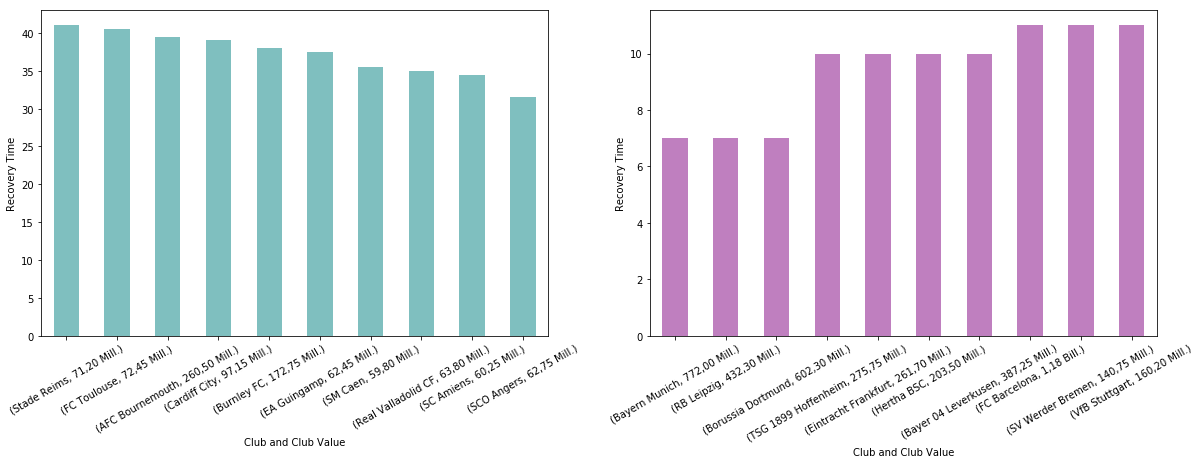

In [16]:
# Club wise Median recovery time
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
injury_info_df_updated.groupby(["club","club_value"])["recovery_time"].median().\
                        sort_values(ascending=False)[:10].plot(kind="bar", color="teal", alpha=.5)
plt.xticks(rotation=30)
plt.xlabel("Club and Club Value")
plt.ylabel("Recovery Time")

plt.subplot(1,2,2)
injury_info_df_updated.groupby(["club","club_value"])["recovery_time"].median().\
                        sort_values(ascending=True)[:10].plot(kind="bar", color="purple", alpha=.5)
plt.xticks(rotation=30)
plt.xlabel("Club and Club Value")
plt.ylabel("Recovery Time")

### 2. What are the 5 injuries that have the most recovery time ?

In [17]:
injury_info_df_updated.groupby(["injury_name"])["recovery_time"].median().sort_values(ascending=False)[:5]

injury_name
Compression of spinal        428.0
Tibia and Fibula Fracture    249.0
Patella rupture              245.0
Tibia Fracture               201.0
Achilles tendon rupture      199.0
Name: recovery_time, dtype: float64

Text(0, 0.5, 'Recovery Time')

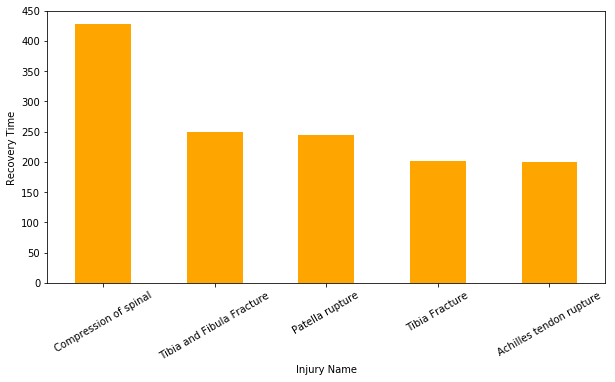

In [18]:
# Visualization of results
plt.figure(figsize=(10,5))
injury_info_df_updated.groupby(["injury_name"])["recovery_time"].\
    median().sort_values(ascending=False)[:5].\
    plot(kind="bar", color="orange")
plt.xticks(rotation=30)
plt.xlabel("Injury Name")
plt.ylabel("Recovery Time")

### 3. Analyse the recovery time from an injurie according to player's age.

Text(0, 0.5, 'Recovery Time')

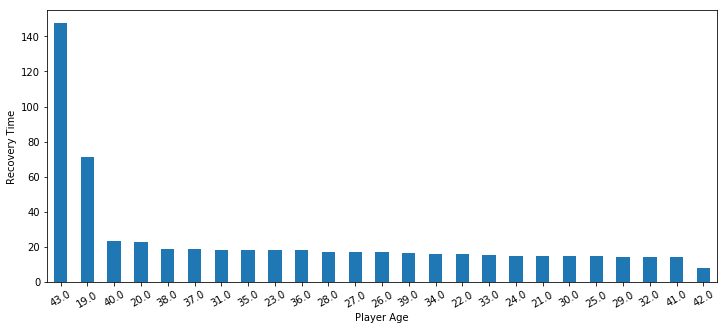

In [19]:
# Visualization of Recovery_time wrt Player Age
plt.figure(figsize=(12,5))
injury_info_df_updated.groupby(["player_age"])["recovery_time"].median().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Player Age")
plt.ylabel("Recovery Time")

In [20]:
# Creating a separate dataframe for better analysis i.e. within an Age Group
inj_df = pd.DataFrame(injury_info_df_updated.groupby(["player_age"])["recovery_time"].median().sort_values(ascending=False)).reset_index()
inj_df["age_group"] = inj_df["player_age"].apply(lambda x: "<20" if x<=20 else
                                                            "20-25" if x>20 and x<=25 else
                                                            "26-30" if x>26 and x<=30 else
                                                            "30-35" if x>30 and x<=35 else
                                                            "35-40" if x>35 and x<=40 else
                                                            ">40")

Text(0, 0.5, 'Recovery Time')

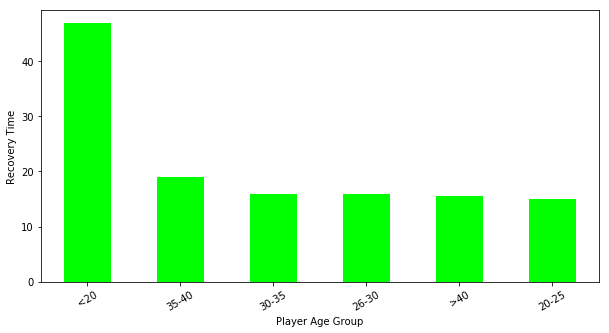

In [21]:
# Visualization of results
plt.figure(figsize=(10,5))
inj_df.groupby(["age_group"])["recovery_time"].median().sort_values(ascending=False).plot(kind="bar", color="lime")
plt.xticks(rotation=30)
plt.xlabel("Player Age Group")
plt.ylabel("Recovery Time")

# *Join all 3 different datasets to run NN on them

In [22]:
# Drop duplicate entries from Injury and Transfer data and keep only latest record
injury_info_df_updated_dedup = injury_info_df_updated.drop_duplicates(subset = ['playerId'], keep = 'first')
transfer_info_df_updated_dedup = transfer_info_df_updated.drop_duplicates(subset = ['playerId'], keep = 'first')

In [23]:
# Join all 3 datasets
concatenated_df = player_info_df.merge(injury_info_df_updated_dedup, on='playerId').\
                                merge(transfer_info_df_updated_dedup,on='playerId')

In [24]:
concatenated_df.columns

Index(['playerId', 'name', 'club_x', 'club_value_x', 'birth', 'weight',
       'height', 'country', 'role', 'foot', 'player_age_x', 'club_y',
       'club_value_y', 'injuries_count', 'injury_name', 'player_age_y',
       'recovery_time', 'season_x', 'date', 'from_club', 'no_of_transfers',
       'season_y', 'to_club'],
      dtype='object')

In [25]:
# Dropping irrelevant columns which don't have any relevance for Model building
concatenated_df.drop(['playerId', 'name', 'club_y', 'club_value_y', 'player_age_y', 'season_x', 'date', 'from_club', 'season_y', 'to_club'],
                    axis=1, inplace=True)

In [26]:
concatenated_df.head()

,club_x,club_value_x,birth,weight,height,country,role,foot,player_age_x,injuries_count,injury_name,recovery_time,no_of_transfers
0,Manchester City,"1,14 Bill.",1993-08-17,89.0,188.0,Brazil,Goalkeeper,left,27.0,1,Meniscal Injury,29.0,6
1,Manchester City,"1,14 Bill.",1983-04-13,84.0,184.0,Chile,Goalkeeper,right,37.0,7,Achilles tendon rupture,314.0,4
2,Manchester City,"1,14 Bill.",1994-05-28,69.0,188.0,England,Defender - Centre-Back,right,26.0,6,Muscle Injury,6.0,3
3,Manchester City,"1,14 Bill.",1994-05-27,85.0,191.0,France,Defender - Centre-Back,left,26.0,7,Muscle Injury,12.0,4
4,Manchester City,"1,14 Bill.",1988-02-12,80.0,183.0,Argentina,Defender - Centre-Back,right,32.0,2,Ankle problems,7.0,7


In [27]:
concatenated_df.dtypes

club_x              object
club_value_x        object
birth               object
weight             float64
height             float64
country             object
role                object
foot                object
player_age_x       float64
injuries_count       int64
injury_name         object
recovery_time      float64
no_of_transfers      int64
dtype: object

### 4. Is there a correlation between number of transfer and number of injuries?

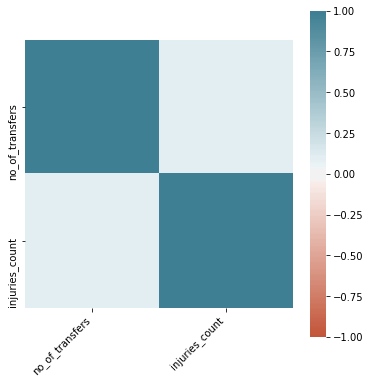

In [28]:
plt.figure(figsize=(6,6))
corr = concatenated_df[["no_of_transfers", "injuries_count"]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 5. Is there a correlation between number of transfer and recovery time ?

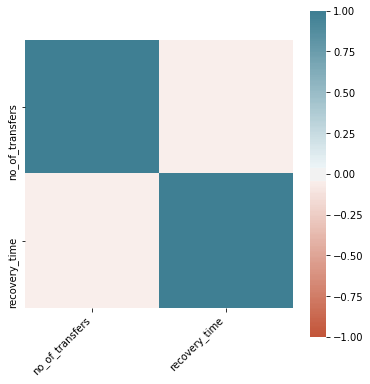

In [29]:
plt.figure(figsize=(6,6))
corr = concatenated_df[["no_of_transfers", "recovery_time"]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 6. Which is the club with maximum number of injuries ?

Text(0, 0.5, 'COunt of Injuries')

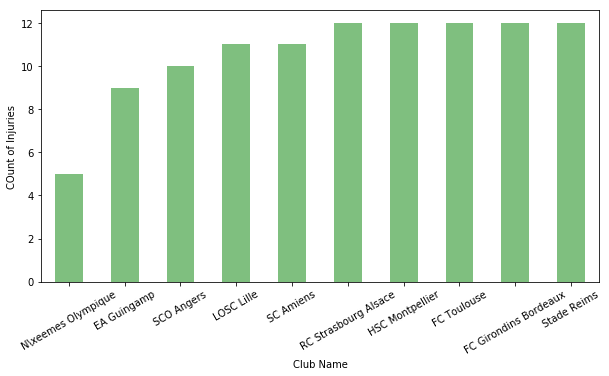

In [30]:
plt.figure(figsize=(10,5))
concatenated_df.groupby("club_x")["injuries_count"].count().sort_values()[:10].plot(kind="bar", color="green", alpha=0.5)
plt.xticks(rotation=30)
plt.xlabel("Club Name")
plt.ylabel("COunt of Injuries")

### 7. Which role has maximum injuries count ?

Text(0, 0.5, 'Count of Injuries')

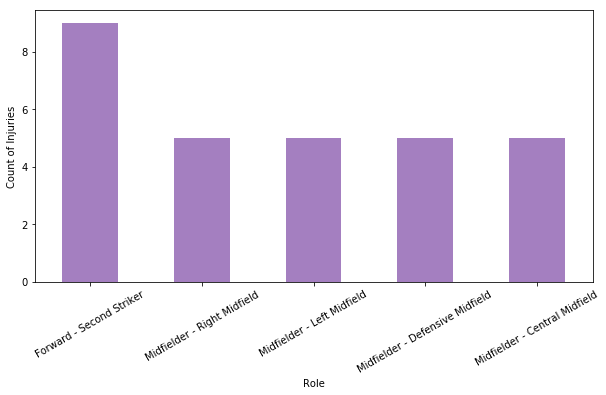

In [31]:
plt.figure(figsize=(10,5))
concatenated_df.groupby("role")["injuries_count"].median().sort_values(ascending=False)[:5].\
                                        plot(kind="bar", color="indigo", alpha=0.5)
plt.xticks(rotation=30)
plt.xlabel("Role")
plt.ylabel("Count of Injuries")

# *Data preparation for model building

### Label Encoding of categorical fields

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
cat_cols = ['club_x', 'club_value_x', 'country', 'role', 'foot', 'injury_name']

for col in cat_cols:
    concatenated_df[col] = le.fit_transform(concatenated_df[col])

### Creating additional features from date field

In [34]:
concatenated_df["birth_month"] = concatenated_df["birth"].str.split("-", n=3, expand=True)[1]
concatenated_df["birth_day"] = concatenated_df["birth"].str.split("-", n=3, expand=True)[2]

In [35]:
concatenated_df["birth_month"] = concatenated_df["birth_month"].apply(lambda x: np.nan if x=="" else float(x))
concatenated_df["birth_day"] = concatenated_df["birth_day"].apply(lambda x: np.nan if x=="" else float(x))

In [36]:
concatenated_df["weight"] = concatenated_df["weight"].fillna(concatenated_df["weight"].median())

In [37]:
concatenated_df.head()

,club_x,club_value_x,birth,weight,height,country,role,foot,player_age_x,injuries_count,injury_name,recovery_time,no_of_transfers,birth_month,birth_day
0,54,0,1993-08-17,89.0,188.0,10,7,11,27.0,1,109,29.0,6,8.0,17.0
1,54,0,1983-04-13,84.0,184.0,18,7,12,37.0,7,5,314.0,4,4.0,13.0
2,54,0,1994-05-28,69.0,188.0,31,0,12,26.0,6,116,6.0,3,5.0,28.0
3,54,0,1994-05-27,85.0,191.0,35,0,11,26.0,7,116,12.0,4,5.0,27.0
4,54,0,1988-02-12,80.0,183.0,3,0,12,32.0,2,12,7.0,7,2.0,12.0


## Import Neural-network libraries

In [38]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data Split in Train and Test sets

### 8. Question: Predict Recovery time using Deep Learning

### Datasets for Predicting Recovery_time 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                154       
_________________________________________________________________
dense_1 (Dense)              (None, 2003)              24036     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2004      
Total params: 26,194
Trainable params: 26,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 0s 51ms/step - mse: 6534.6133 - mae: 42.8819 - loss: 6534.6133 - val_mse: 4933.5781 - val_mae: 31.8979 - val_loss: 4933.5781
Epoch 2/30
9/9 [==============================] - 0s 9ms/step - mse: 5154.3477 - mae: 39.1643 - loss: 5154.3477 - val_mse: 4492.7256 - val_mae: 42.6473 - val_loss: 4492.7256
Epoch 3/30
9/9 [=================

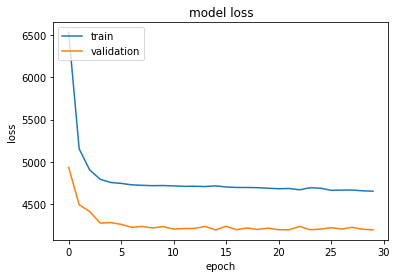

43.67286965229321

In [39]:
x = concatenated_df.drop(["recovery_time", "birth"], axis=1)
y = concatenated_df["recovery_time"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Restting the index of datasets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

model = Sequential()
model.add(Dense(11, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(2003, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model.fit(X_train, y_train, epochs=30, batch_size=150,  verbose=1, validation_split=0.2)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Predict recovery time for test data
predicted_recovery_time = model.predict(X_test)

# Calculating Mean absolute error in prediction and test data
mean_absolute_error(y_test, predicted_recovery_time)

### Section: 8.1 Prediction of "Recovery Time" for a player for Club "Athletic Bilbao"

In [40]:
# Testing on data with "Athletic Bilbao" club
Athletic_Bilbao_data = concatenated_df.iloc[1812:1813].drop(["recovery_time", "birth"], axis=1)

In [41]:
Athletic_Bilbao_data

,club_x,club_value_x,weight,height,country,role,foot,player_age_x,injuries_count,injury_name,no_of_transfers,birth_month,birth_day
1812,10,28,90.0,187.0,88,7,12,32.0,2,116,9,1.0,25.0


#### Note: "Athletic Bilbao" club has "club_x" value of "10" after label encoding

In [42]:
model.predict(Athletic_Bilbao_data.values)

array([[38.654842]], dtype=float32)

#### 38.6 (or 39 roundoff) is the number of days for a player to recover for Athletic Bilbao club for a player whose data is mentioned above

### 9. Question: Predict Number of Injuries for a player

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                154       
_________________________________________________________________
dense_4 (Dense)              (None, 2003)              24036     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2004      
Total params: 26,194
Trainable params: 26,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 0s 40ms/step - mse: 27.0218 - mae: 4.2129 - loss: 27.0218 - val_mse: 29.6140 - val_mae: 4.1710 - val_loss: 29.6140
Epoch 2/30
9/9 [==============================] - 0s 14ms/step - mse: 21.6727 - mae: 3.7549 - loss: 21.6727 - val_mse: 22.1905 - val_mae: 4.0560 - val_loss: 22.1905
Epoch 3/30
9/9 [==============================] - 

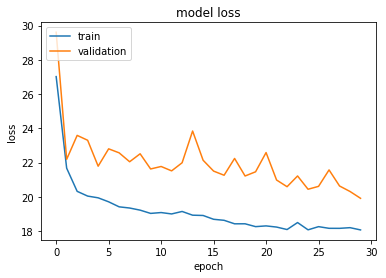

3.7511215896929726

In [43]:
# Separating x and y for number of injuries
x = concatenated_df.drop(["injuries_count", "birth"], axis=1)
y = concatenated_df["injuries_count"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Resetting index of the datasets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Creating model
model = Sequential()
model.add(Dense(11, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(2003, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model.fit(X_train, y_train, epochs=30, batch_size=150,  verbose=1, validation_split=0.2)

# Printing loss values
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Getting prediction of injuries
predicted_injuries_count = model.predict(X_test)

mean_absolute_error(y_test, predicted_injuries_count)


### Section: 9.1 Prediction of "Number of Injuries" for a player for Club "Athletic Bilbao"

In [44]:
# Testing on data with "Athletic Bilbao" club
Athletic_Bilbao_inj_data = concatenated_df.iloc[1812:1813].drop(["injuries_count", "birth"], axis=1)

In [45]:
Athletic_Bilbao_inj_data

,club_x,club_value_x,weight,height,country,role,foot,player_age_x,injury_name,recovery_time,no_of_transfers,birth_month,birth_day
1812,10,28,90.0,187.0,88,7,12,32.0,116,56.0,9,1.0,25.0


#### Note: "Athletic Bilbao" club has "club_x" value of "10" after label encoding

In [46]:
model.predict(Athletic_Bilbao_inj_data.values)

array([[7.1353736]], dtype=float32)

#### 7.1 (or 7 roundoff) is the number of injuries a player can have for Athletic Bilbao club for a player whose data is mentioned above